# Analyzing Meteorite Landings

The dataset used includes over 45,000 known meteorite landings in recorded history (up to 2013) as collected by The Meteoritical Society and can be found [here](https://datarepository.wolframcloud.com/resources/Meteorite-Landings). 

For each meteorite landing, it includes the name and type of each object, the location of its discovery, whether it was discovered falling ('Fell') or already on the Earth ('Found'), and the condition of the meteorite as 'Valid' (for most meteorites) or 'Relict' (for objects that were once meteorites but are now highly altered by weathering on Earth).

In [1]:
import pandas as pd
meteorites = pd.read_csv("Meteorite-Landings.csv")
meteorites

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"
...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,"Quantity[172, ""Grams""]",Found,"DateObject[{1990}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{29.037, 17.0185}]"
45712,Zinder,30409,Valid,"Pallasite, ungrouped","Quantity[46, ""Grams""]",Found,"DateObject[{1999}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{13.78333, 8.96667}]"
45713,Zlin,30410,Valid,H4,"Quantity[3.3, ""Grams""]",Found,"DateObject[{1939}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{49.25, 17.66667}]"
45714,Zubkovsky,31357,Valid,L6,"Quantity[2167, ""Grams""]",Found,"DateObject[{2003}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{49.78917, 41.5046}]"


Looking at the data, condition of the meteorite is under the colum `NameType`. There is also a `Classification` column with the meteorite class. `Mass`, `Year` and `Coordinates` columns have to be cleaned before the analysis. 

In [2]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


The only column with integer data type is `ID`. Also there is an entry for every row and column, but we will take a closer look in next steps.

In [3]:
for col in meteorites.columns:
    print("Unique values in", col, "column:", len(meteorites[col].value_counts()))

Unique values in Name column: 45716
Unique values in ID column: 45716
Unique values in NameType column: 2
Unique values in Classification column: 466
Unique values in Mass column: 12577
Unique values in Fall column: 2
Unique values in Year column: 265
Unique values in Coordinates column: 17100


## Cleaning the data

#### Mass column

In [4]:
meteorites['Mass'].value_counts()

Quantity[1.3, "Grams"]       171
Quantity[1.2, "Grams"]       140
Quantity[1.4, "Grams"]       138
Missing["NotAvailable"]      131
Quantity[2.1, "Grams"]       130
                            ... 
Quantity[38.32, "Grams"]       1
Quantity[32.34, "Grams"]       1
Quantity[26.01, "Grams"]       1
Quantity[385.28, "Grams"]      1
Quantity[2167, "Grams"]        1
Name: Mass, Length: 12577, dtype: int64

We want `Mass` column as a numeric value. The units are grams. The value `Missing["NotAvailable"]` is present, so there are missing values in `Mass` column.

In [5]:
mass = meteorites['Mass'].str.strip('Quantity[')
mass = mass.str.strip(', "Grams"]')
mass

0            21
1           720
2        107000
3          1914
4           780
          ...  
45711       172
45712        46
45713       3.3
45714      2167
45715       200
Name: Mass, Length: 45716, dtype: object

In [6]:
mass.value_counts()

1.3                      171
1.2                      140
1.4                      138
Missing["NotAvailable    131
2.1                      130
                        ... 
38.32                      1
32.34                      1
26.01                      1
385.28                     1
2167                       1
Name: Mass, Length: 12577, dtype: int64

#### Year column

In [7]:
meteorites['Year'].value_counts()

DateObject[{2003}, "Year", "Gregorian", -5.]    3323
DateObject[{1979}, "Year", "Gregorian", -5.]    3046
DateObject[{1998}, "Year", "Gregorian", -5.]    2697
DateObject[{2006}, "Year", "Gregorian", -5.]    2456
DateObject[{1988}, "Year", "Gregorian", -5.]    2296
                                                ... 
DateObject[{1519}, "Year", "Gregorian", -5.]       1
DateObject[{1671}, "Year", "Gregorian", -5.]       1
DateObject[{1833}, "Year", "Gregorian", -5.]       1
DateObject[{1779}, "Year", "Gregorian", -5.]       1
DateObject[{1792}, "Year", "Gregorian", -5.]       1
Name: Year, Length: 265, dtype: int64

To clean the column and get only the year number:

In [8]:
year = meteorites['Year'].str.strip("DateObject\[{")
year = year.str.strip("\-5\.\]")
year = year.str.strip(" \"Gregorian\",")
year = year.str.strip("\"Y")
year = year.str.strip("}, ")
year

0        1880
1        1951
2        1952
3        1976
4        1902
         ... 
45711    1990
45712    1999
45713    1939
45714    2003
45715    1976
Name: Year, Length: 45716, dtype: object

Let's try to search for entries containing "Missing":

In [9]:
year.str.contains('Missing').sum()

292

There are missing values in the `Year` column also.

#### Coordinates column

In [10]:
meteorites['Coordinates'].value_counts()

Missing["NotAvailable"]                13529
GeoPosition[{-71.5, 35.66667}]          4761
GeoPosition[{-84., 168.}]               3040
GeoPosition[{-72., 26.}]                1505
GeoPosition[{-79.68333, 159.75}]         657
                                       ...  
GeoPosition[{-76.30361, 157.17611}]        1
GeoPosition[{-76.28611, 157.23972}]        1
GeoPosition[{-76.31889, 157.265}]          1
GeoPosition[{-76.28722, 157.19333}]        1
GeoPosition[{33.98333, -115.68333}]        1
Name: Coordinates, Length: 17100, dtype: int64

Once again we see the missing values in the `Coordinates` column.

To get the coordinates we can use for visualization, we will clean the column and then separate latitude and longitude.

In [11]:
coordinates = meteorites['Coordinates'].str.strip("GeoPosition[{")
coordinates = coordinates.str.strip("}]")
coordinates[coordinates=="Missing[\"NotAvailable\""] = "NaN,NaN"
coordinates_list = coordinates.str.split(',')

In [12]:
# adding a zero if there isn't one after the decimal point
for i in coordinates_list:
    x=i[0]
    y=i[1]
    if x[-1] == '.':
        x = x + '0'
        i[0] = x
    if y[-1] == '.':
        y = y + '0'
        i[1] = y
coordinates_list

0             [50.775,  6.08333]
1          [56.18333,  10.23333]
2            [54.21667,  -113.0]
3             [16.88333,  -99.9]
4           [-33.16667,  -64.95]
                  ...           
45711         [29.037,  17.0185]
45712       [13.78333,  8.96667]
45713         [49.25,  17.66667]
45714       [49.78917,  41.5046]
45715    [33.98333,  -115.68333]
Name: Coordinates, Length: 45716, dtype: object

In [13]:
# latitude and longitude as separate lists
X=[]
Y=[]
for i in coordinates_list:
    X.append(i[0])
    Y.append(i[1])
print(X[0:5])
print(Y[0:5])

['50.775', '56.18333', '54.21667', '16.88333', '-33.16667']
[' 6.08333', ' 10.23333', ' -113.0', ' -99.9', ' -64.95']


#### Columns to numeric data type

Finally, we can convert the cleaned columns to numeric data type. We'll use parameter `errors="coerce"` so missing values will be set as NaN.

In [14]:
meteorites['Mass'] = pd.to_numeric(mass, errors="coerce")
meteorites['Year'] = pd.to_numeric(year, errors="coerce")
meteorites['X'] = pd.to_numeric(X, errors="coerce")
meteorites['Y'] = pd.to_numeric(Y, errors="coerce")
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45716 non-null  object 
 1   ID              45716 non-null  int64  
 2   NameType        45716 non-null  object 
 3   Classification  45716 non-null  object 
 4   Mass            45585 non-null  float64
 5   Fall            45716 non-null  object 
 6   Year            45424 non-null  float64
 7   Coordinates     45716 non-null  object 
 8   X               32187 non-null  float64
 9   Y               32187 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [15]:
meteorites

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates,X,Y
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,"GeoPosition[{50.775, 6.08333}]",50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,"GeoPosition[{56.18333, 10.23333}]",56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,"GeoPosition[{54.21667, -113.}]",54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,"GeoPosition[{16.88333, -99.9}]",16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,"GeoPosition[{-33.16667, -64.95}]",-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,"GeoPosition[{29.037, 17.0185}]",29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,"GeoPosition[{13.78333, 8.96667}]",13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,"GeoPosition[{49.25, 17.66667}]",49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,"GeoPosition[{49.78917, 41.5046}]",49.78917,41.50460


## Missing values

In [16]:
meteorites.isnull().mean()

Name              0.000000
ID                0.000000
NameType          0.000000
Classification    0.000000
Mass              0.002866
Fall              0.000000
Year              0.006387
Coordinates       0.000000
X                 0.295936
Y                 0.295936
dtype: float64

After cleaning, some columns have a small percentage of missing values: `Mass` (0.29%) and `Year` (0.64%), but columns `X` and `Y` have almost 30% missing.

#### Mass column

To drop the missing values:

In [17]:
meteorites_cleaned = meteorites
meteorites_cleaned = meteorites_cleaned.dropna(subset=['Mass'])

In [18]:
meteorites_cleaned['Mass'].isnull().sum()

0

Let's check the minimum value of mass:

In [19]:
meteorites['Mass'].min()

0.0

In [20]:
meteorites[meteorites['Mass']==0]

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates,X,Y
12640,Graves Nunataks 06102,52859,Relict,Relict iron,0.0,Found,1979.0,"GeoPosition[{-12.26333, 136.83833}]",-12.26333,136.83833
25557,Miller Range 090484,55953,Valid,CO3,0.0,Found,2009.0,"Missing[""NotAvailable""]",NaN,NaN
31061,Österplana 049,56147,Relict,Relict OC,0.0,Found,2004.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31062,Österplana 050,56148,Relict,Relict OC,0.0,Found,2012.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31063,Österplana 051,56149,Relict,Relict OC,0.0,Found,2003.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31064,Österplana 052,56150,Relict,Relict OC,0.0,Found,2006.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31065,Österplana 053,56151,Relict,Relict OC,0.0,Found,2006.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31066,Österplana 054,56152,Relict,Relict OC,0.0,Found,2002.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31067,Österplana 055,56153,Relict,Relict OC,0.0,Found,2005.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333
31068,Österplana 056,56154,Relict,Relict OC,0.0,Found,2008.0,"GeoPosition[{58.58333, 13.43333}]",58.58333,13.43333


In [21]:
meteorites_cleaned.shape

(45585, 10)

In [22]:
meteorites_cleaned = meteorites_cleaned[meteorites_cleaned['Mass'] != 0.0]
meteorites_cleaned.shape

(45566, 10)

#### Year column

In [23]:
meteorites_cleaned = meteorites_cleaned.dropna(subset=['Year'])
meteorites_cleaned['Year'] = meteorites_cleaned['Year'].astype('int')
meteorites_cleaned.shape

(45290, 10)

#### Latitude and Longitude

In [24]:
meteorites_cleaned_latlong = meteorites_cleaned.dropna(subset=['X', 'Y'])
meteorites_cleaned_latlong.shape

(31911, 10)

## Interesting statistics

### Mass

In [25]:
print("In total", round(meteorites_cleaned['Mass'].sum()/1000000, 2), "tonnes of recorded and weighed metorite in the database has fallen on Earth.")
print("Mass of the heaviest meteorite in the database is", round(meteorites_cleaned['Mass'].max()/1000000, 2), "tonnes.")
print("Mass of the",(meteorites_cleaned['Mass'] == meteorites_cleaned['Mass'].min()).sum(), "lightest meteorites in the database is", meteorites_cleaned['Mass'].min(), "grams.")

In total 603.3 tonnes of recorded and weighed metorite in the database has fallen on Earth.
Mass of the heaviest meteorite in the database is 60.0 tonnes.
Mass of the 2 lightest meteorites in the database is 0.01 grams.


Since the values of meteorite mass range from 10 miligrams up to 60 tonnes, to plot the distribution we'll use logarithmic scale:

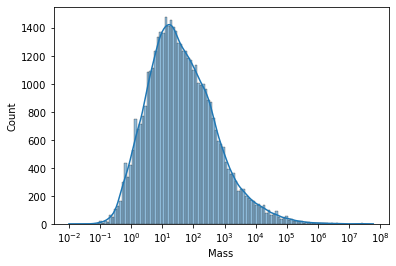

In [26]:
import seaborn as sns
import numpy as np

h = sns.histplot(x=meteorites_cleaned['Mass'], log_scale=True, kde = True)
h.set_xticks(np.logspace(-2, 8, num = 11))

In [27]:
kdeline = pd.DataFrame()
kdeline["xx"], kdeline["yy"] = h.get_lines()[0].get_data()
kdeline[kdeline["yy"]==kdeline["yy"].max()]

,xx,yy
66,17.498666,1422.484068


Group with the highest count of meteorites (over 1400) has mass of around 17.5g.

In [28]:
print("50% of mass values are under", round(meteorites_cleaned['Mass'].median(), 2), "grams.")
print("90% of mass values are under", round(meteorites_cleaned['Mass'].quantile(q=0.9)/1000, 2), "kg.")
print("Additionaly, 90% of meteorites have mass ranging from", meteorites_cleaned['Mass'].quantile(q=0.05),"g to", meteorites_cleaned['Mass'].quantile(q=0.95)/1000,"kg.")
print("Additionaly, 95% of meteorites have mass ranging from", meteorites_cleaned['Mass'].quantile(q=0.025),"g to", round(meteorites_cleaned['Mass'].quantile(q=0.975)/1000,2),"kg.")
print("Additionaly, 99% of meteorites have mass ranging from", meteorites_cleaned['Mass'].quantile(q=0.005),"g to", meteorites_cleaned['Mass'].quantile(q=0.995)/1000,"kg.") 

50% of mass values are under 32.17 grams.
90% of mass values are under 1.1 kg.
Additionaly, 90% of meteorites have mass ranging from 1.1 g to 4.0 kg.
Additionaly, 95% of meteorites have mass ranging from 0.67 g to 13.25 kg.
Additionaly, 99% of meteorites have mass ranging from 0.3 g to 136.0 kg.


### Type

In [29]:
meteorites_cleaned['Classification'].value_counts().head(5)

L6    8234
H5    7102
L5    4755
H6    4516
H4    4185
Name: Classification, dtype: int64

Most meteorites are classified as L and H chondrites, which are most common groups of asteroids (chondrites represent over 85% of total meteorite population). 

The ordinary chondrites have 3 groups (as described [here](https://en.wikipedia.org/wiki/Ordinary_chondrite#Chemical_composition) and [here](http://www.meteorite.fr/en/classification/ordinarychon.htm)):
- H chondrites (highest total iron, high metal and lower iron oxide in the silicates)
- L chondrites (lower total iron, lower metal and higher iron oxide in the silicates)
- LL chondrites (low total iron and Low metal and highest iron oxide in the silicates)

There are also some subgroups:

In [30]:
meteorites_cleaned[meteorites_cleaned['Classification'].str.contains('/')==True]

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates,X,Y
20,Albareto,453,Valid,L/LL4,2000.00,Fell,1766,"GeoPosition[{44.65, 11.01667}]",44.65000,11.01667
121,Bjurböle,5064,Valid,L/LL4,330000.00,Fell,1899,"GeoPosition[{60.4, 25.8}]",60.40000,25.80000
143,Bremervörde,5135,Valid,H/L3.9,7250.00,Fell,1855,"GeoPosition[{53.4, 9.1}]",53.40000,9.10000
157,Cabezo de Mayo,5185,Valid,L/LL6,25000.00,Fell,1870,"GeoPosition[{37.98333, -1.16667}]",37.98333,-1.16667
160,Cali,45976,Valid,H/L4,478.00,Fell,2007,"GeoPosition[{3.405, -76.51}]",3.40500,-76.51000
...,...,...,...,...,...,...,...,...,...,...
45229,Yamato 983551,40173,Valid,H/L6,6.91,Found,1998,"Missing[""NotAvailable""]",NaN,NaN
45265,Yamato 983598,40220,Valid,L5/6,8.81,Found,1998,"Missing[""NotAvailable""]",NaN,NaN
45289,Yamato 983629,40251,Valid,H/L6,4.46,Found,1998,"Missing[""NotAvailable""]",NaN,NaN
45528,Yamato 983931,40551,Valid,H/L4,8.12,Found,1998,"Missing[""NotAvailable""]",NaN,NaN


To find rough percentages of the classes:

In [31]:
c1 = meteorites_cleaned[meteorites_cleaned['Classification'].str.contains('^L$')==True]
c2 = meteorites_cleaned[meteorites_cleaned['Classification'].str.contains('^L{1}[0-9]')==True]
c3 = meteorites_cleaned[meteorites_cleaned['Classification'].str.contains('^L{2}')==True]
c4 = meteorites_cleaned[meteorites_cleaned['Classification'].str.contains('^H')==True]
c5 = meteorites_cleaned
c5 = pd.concat([c1,c2,c3,c4,c5]).drop_duplicates(keep=False)

print("L chondrites:", round(((c1.shape[0] + c2.shape[0])/meteorites_cleaned.shape[0])*100, 2), "%")
print("H chondrites:", round(c3.shape[0]/meteorites_cleaned.shape[0]*100, 2), "%")
print("LL chondrites:", round(c4.shape[0]/meteorites_cleaned.shape[0]*100, 2), "%")
print("Other meteorite classes:", round((meteorites_cleaned.shape[0]-c1.shape[0]-c2.shape[0]-c3.shape[0]-c4.shape[0])/meteorites_cleaned.shape[0]*100, 2), "%")

L chondrites: 34.17 %
H chondrites: 12.96 %
LL chondrites: 39.87 %
Other meteorite classes: 13.0 %


Ordinary chondrites represent approximately 87% of meteorites in the database.

### Fall

In [32]:
meteorites['Fall'].value_counts()/meteorites['Fall'].shape[0]*100

Found    97.578528
Fell      2.421472
Name: Fall, dtype: float64

Only 2.42% of meteorites were discovered falling, others were found already on Earth.

### Condition

In [33]:
meteorites['NameType'].value_counts()/meteorites['NameType'].shape[0]*100

Valid     99.835944
Relict     0.164056
Name: NameType, dtype: float64

Only 0.16% of meteorites were found weathered on Earth.

### Time

In [34]:
print("Database timeframe: from year", meteorites_cleaned['Year'].min(), "to year", meteorites_cleaned['Year'].max())

Database timeframe: from year 860 to year 2013


Top ten years with most obsevations:

In [35]:
meteorites_cleaned['Year'].value_counts().head(10)

2003    3322
1979    3044
1998    2693
2006    2453
1988    2296
2002    2072
2004    1939
2000    1781
1997    1691
1999    1687
Name: Year, dtype: int64

(800.0, 2100.0)

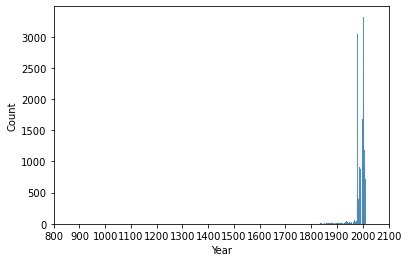

In [36]:
h = sns.histplot(x=meteorites_cleaned['Year'])
h.set_xticks(np.linspace(800, 2100, num = 14))
h.set_xlim(left=800, right=2100)

(1800.0, 2050.0)

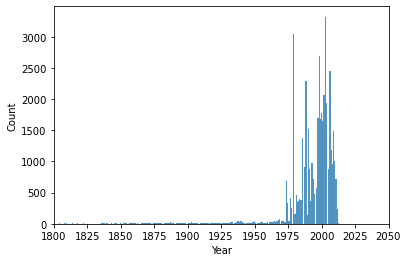

In [37]:
h = sns.histplot(x=meteorites_cleaned['Year'])
h.set_xticks(np.linspace(1800, 2050, num = 11))
h.set_xlim(left=1800, right=2050)

Most of the observations are from 1970s onwards.

In [38]:
print("There are", (meteorites_cleaned['Year']>1970).sum(), "recorded meteorite landings after 1970.")
print("There are", ((meteorites_cleaned['Year']>=1800) & (meteorites_cleaned['Year']<=1970)).sum(), "recorded meteorite landings from 1800 to 1970.")
print("There are only", (meteorites_cleaned['Year']<1800).sum(), "recorded meteorite landings before 1800.")

There are 42999 recorded meteorite landings after 1970.
There are 2244 recorded meteorite landings from 1800 to 1970.
There are only 47 recorded meteorite landings before 1800.


### Location

To visualize meteorites with available fall coordinates: 

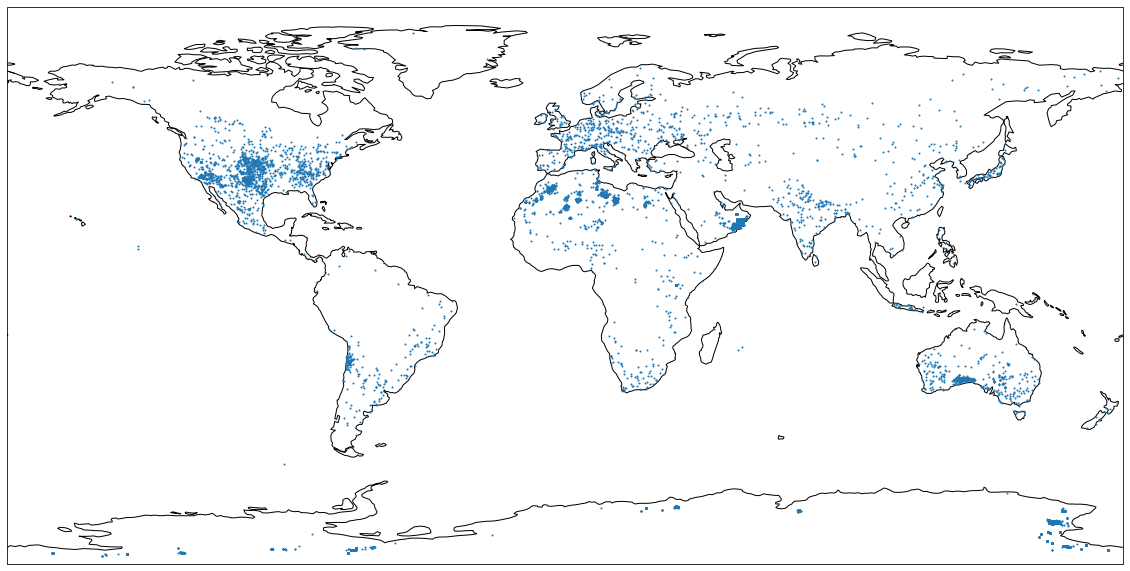

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lat = meteorites_cleaned_latlong['X'].tolist()
long = meteorites_cleaned_latlong['Y'].tolist()
x, y = (long, lat)
ax.scatter(x, y, s=1)
plt.show()